In [20]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from simons_array_python.calibration.planet import ephem_planet

In [21]:
def radec_to_azel(ra, dec, observer):
    obj = ephem.FixedBody()
    obj._ra = ra
    obj._dec = dec
    obj._epoch = observer.epoch
    obj.compute(observer)
    az, el = obj.az, obj.alt
    return az, el

In [22]:
def get_error_angles(ra1, dec1, ra2, dec2):
    
    return np.arccos(np.dot(hp.ang2vec(np.pi/2-dec1, ra1), hp.ang2vec(np.pi/2-dec2, ra2)))

In [23]:
observer = ephem_planet.pb2a_site()
observer.pressure=0
observer.date=45000  # pick some random date
observer

<ephem.Observer date='2023/3/16 12:00:00' epoch='2000/1/1 12:00:00' lon='-67:47:10.6' lat='-22:57:28.5' elevation=5156.0m horizon=0:00:00.0 temp=15.0C pressure=0.0mBar>

Max az, el error in arcseconds 0.04898488628739321 0.0


/tmp/ipykernel_6894/2252095717.py:3: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.dot(hp.ang2vec(np.pi/2-dec1, ra1), hp.ang2vec(np.pi/2-dec2, ra2)))


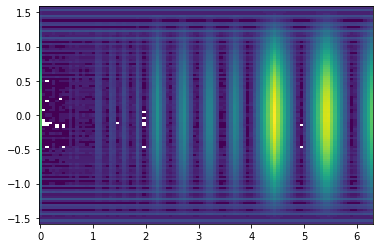

In [24]:
#sweep over azel
az_sweep = np.linspace(0, 2*np.pi, 100)
el_sweep = np.linspace(-np.pi/2+1e-6, np.pi/2-1e-6, 100)

errors = np.zeros((len(az_sweep), len(el_sweep)))
for i, az in enumerate(az_sweep):
    for j, el in enumerate(el_sweep):
        ra, dec = observer.radec_of(az, el)
        recon_az, recon_el = radec_to_azel(ra, dec, observer)
        errors[j][i] = get_error_angles(az, el, recon_az, recon_el)
        
X, Y = np.meshgrid(az_sweep, el_sweep)
plt.pcolormesh(X, Y, errors)
print('Max az, el error in arcseconds', np.nanmax(errors) * 180/np.pi * 60 *60, np.nanmin(errors) * 180/np.pi * 60 * 60  )
